# k平均法

## k平均法によるクラスタリングと応用例

### 教師なし学習モデルとしてのクラスタリング

k平均法は「教師なし学習」、トレーニングセットとして与えられるデータは目的変数を持たない。クラスタリングを行うには、何らかの方法で、グループ分けの良し悪しを判断する基準を事前に設定する必要がある。ここでは「二乗歪み」と呼ばれる値を定義し、これをなるべく小さくするグループ分けの方法を見つけ出す。

### k平均法によるクラスタリング

例として、$(x, y)$平面上の多数の点$\left\{ (x_n, y_n) \right\}_{n=1}^N$が与えられたとする。このデータを2つのクラスターに分類する。この後の説明では$(x, y)$平面上の点はベクトル記号で表記する($\mathbf{x} = (x_n, y_n) ^ {\mathrm{T}}$)。

まずそれぞれのクラスターの代表点$\left\{\mathbf{\mu}_k\right\}_{k=1}^2$を設定する。続いて、トレーニングセットの各点について、「どちらの代表点に所属するか」を、代表点との距離$\| \mathbf{x}_n - \mathbf{\mu}_k \|$を計算して、距離が短い方の代表点に所属すると決める。それぞれの点がどちらの代表点に所属するかを示す変数$r_{nk}$を以下のとおり定義する。

$$
r_{nk} = \begin{cases}
    1 & x_nがk番目の代表点に所属する場合 \\
    0 & それ以外の場合
\end{cases}
$$

次に、現在のクラスターを元にして、あらたな代表点をとりなおす。代表点としては、それぞれのクラスターに所属する点の「重心」をあらたな代表点とする。

$$
\begin{align*}
\mathbf{\mu}_k &= \frac{\sum \mathbf{x}_n}{N_k} \ \ \ (k = 1, 2) \tag{6.2} \\
&= \frac{\sum_{n=1}^N r_{nk} \mathbf{x}_n}{\sum_{n=1}^N r_{nk}} \tag{6.3}
\end{align*}
$$

この新たな代表点を元にして、トレーニングセットの各点がどちらの代表点に所属するかを決めなおす。後は同じ手続きを繰り返していく。

#### k平均法の数学的根拠

k平均法は、特定のグループ分けに対する「歪み」を計算して、歪みがなるべく小さくなるグループ分けを探していくという手法である。今回は歪みとして以下の二乗歪みを用いている。

$$
J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \| \mathbf{x_n} - \mathbf{\mu_k} \| ^2 \tag{6.4}
$$

(6.4)は、各データについての「自分が所属するクラスターの代表点からの距離の二乗」を合計した値であり、$J$を小さくするということは、それぞれのクラスターにおいて「代表点になるべく近くにデータが集まるように分類する」という方針に相当する。以下に、k平均法の手続きによって「二乗歪み」の値が小さくなっていき、最終的に極小値に達することの証明を与える。

ここではトレーニングセットとして与えられるデータは、任意の特定次元のベクトルの集合$\left\{ \mathbf{x}_n \right\}_{n=1}^N$とする。これらを$K$個のクラスターに分類するものとして、代表点を$\left\{ \mathbf{\mu}_k \right\}_{k=1}^K$とする。
まず、トレーニングセットの各データがどのクラスターに所属するか決定するが、この時点ではランダムに決まっているものとする。各データが所属するクラスターを以下で表す。

$$
r_{nk} = \begin{cases}
    1 & x_nがk番目の代表点に所属する場合 \\
    0 & それ以外の場合
\end{cases}
$$

現在の状態における二乗歪みは以下の通り定義する。

$$
J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \| \mathbf{x_n} - \mathbf{\mu_k} \| ^2 \tag{6.6}
$$

k平均法の手続きに則って、次に各データが所属するクラスターを選択しなおす。この時、各データ$\mathbf{x}_n$について、代表点からの距離$\| \mathbf{x}_n - \mathbf{\mu}_k \|$が最も小さいクラスターを選択する。$J$の意味(「所属するクラスターの代表点からの距離の二乗の合計」)を考えると、この操作で$J$の値が大きくなることはない。この操作は$r_{nk}$の値を以下の条件で再定義していることになる。

$$
r_{nk} = \begin{cases}
    1 & k = \mathrm{argmin}_{k'} \| \mathbf{x}_n - \mathbf{\mu}_k \|の場合 \\
    0 & それ以外の場合
\end{cases}
$$

続いて、現在の各データの分類状態において、それぞれのクラスターの代表点$\mathbf{\mu}_k$を取り直す。このとき(6.6)を最小にするという条件で$\mathbf{\mu}_k$を選択する。(6.6)は$\mathbf{\mu}_k$についてみると、下に凸な二次関数なので、偏微分係数が$0$になるという条件で最小化できる。まず$J$を成分表記すると($\left[\mathbf{x}_n \right]_i$という記号は、ベクトル$\mathbf{x}_n$の第$i$成分を表している)

$$
J = \sum_{n=1}^N \sum_{k=1}^K \left\{ r_{nk} \sum_i (\left[ \mathbf{x}_n \right]_i - \left[ \mathbf{\mu}_k \right]_i)^2 \right\} \tag{6.8}
$$

よって特定の成分による偏微分係数は以下となる。

$$
\frac{\partial J}{ \partial {\left[ \mathbf{\mu}_k \right]_i}} = -2 \sum_{n=1}^N r_{nk} (\left[ \mathbf{x}_n \right]_i - \left[ \mathbf{\mu}_k \right]_i) \tag{6.9}
$$

上記が0になるという条件から$\left[ \mathbf{\mu}_k \right]_i$は次のようにきまる。

$$
\left[ \mathbf{\mu}_k \right]_i = \frac{ \sum_{n=1}^N r_{nk} \left[ \mathbf{x}_n \right]_i }{ \sum_{n=1}^N r_{nk} } \tag{6.10}
$$

成分表記からベクトル表記に戻すと以下の結果が得られる。

$$
\mathbf{\mu}_k = \frac{ \sum_{n=1}^N r_{nk} \mathbf{x}_n }{ \sum_{n=1}^N r_{nk} } \tag{6.11}
$$

これは、各クラスターの重心を新たな代表点にとるという(6.3)の手続きと同じものになっている。したがって(上記手続きは前述のとおり$J$(6.6)を最小にするという条件で$\mu_k$を選択しているので)(6.3)の手続きによって、$J$が大きくなるということはありえない。
以上より、k平均法の走査を繰り返すと$J$の値は必ず小さくなるか、もしくはそれ以上は変化しない極小点に達する。

### 画像データへの応用

ここではk平均法のアルゴリズムを用いて、下のカラー画像に対し減色処理を施す。

<img src="photo.jpg">

各ピクセルの「色」は、RGBの3つの値で表現してこれを3次元空間の点とみなし、k平均法を適用して「代表色」を得る。代表色を抽出できたら、画像ファイルの各ピクセルを代表色で置き換えることで、画像の減色処理を行う。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from PIL import Image

In [2]:
Colors = [2, 3, 5, 16] # 減色後の色数


Number of clusters: K=2
Initial centers:
[[30, 2, 198], [187, 216, 202]]
[[91, 72, 41], [195, 180, 168]]
Distortion: J=3999074630
[[101, 90, 53], [221, 201, 202]]
Distortion: J=1336764260
[[108, 95, 60], [231, 212, 216]]
Distortion: J=972939582
[[111, 96, 62], [233, 217, 221]]
Distortion: J=909487104
[[112, 96, 63], [234, 218, 223]]
Distortion: J=900728238
[[112, 96, 64], [234, 219, 223]]
Distortion: J=899383398
[[112, 96, 64], [234, 219, 223]]
Distortion: J=899089824

Number of clusters: K=3
Initial centers:
[[222, 11, 73], [104, 206, 98], [202, 7, 15]]
[[208, 69, 108], [161, 170, 142], [98, 37, 27]]
Distortion: J=3731196760
[[204, 63, 99], [200, 199, 186], [79, 85, 40]]
Distortion: J=1812699599
[[194, 59, 88], [227, 218, 217], [83, 105, 53]]
Distortion: J=859649561
[[192, 59, 87], [233, 223, 225], [85, 110, 57]]
Distortion: J=595387215
[[192, 59, 87], [234, 224, 227], [86, 111, 58]]
Distortion: J=577449719
[[192, 59, 87], [235, 225, 227], [86, 112, 58]]
Distortion: J=576089454
[[192

/opt/conda/lib/python3.4/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in true_divide


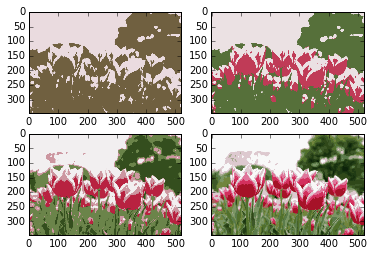

In [3]:
# k平均法による減色処理
def run_kmeans(pixels, k):
    cls = [0] * len(pixels)
    
    # 代表色の初期値をランダムに設定
    center = []
    for i in range(k):
        center.append(np.array([randint(256), randint(256), randint(256)]))
    print("Initial centers:")
    print(list(map(lambda x: x.tolist(), center)))
    print("========================")
    
    distortion = 0.0
    
    # 最大50回のIterationを実施
    for iter_num in range(50):
        center_new = []
        for i in range(k):
            center_new.append(np.array([0, 0, 0]))
        num_points = [0] * k
        distortion_new = 0.0
        
        # E Phase: 各データが所属するグループ(代表色)を計算
        for pix, point in enumerate(pixels):
            min_dist = 256 * 256 * 3
            point = np.array(point)
            for i in range(k):
                d = sum([x * x for x in point - center[i]])
                if d < min_dist:
                    min_dist = d
                    cls[pix] = i
            center_new[cls[pix]] += point
            num_points[cls[pix]] += 1
            distortion_new += min_dist
            
        # M Phase: 新しい代表色を計算
        for i in range(k):
            center_new[i] = (center_new[i] / num_points[i]).astype(int)
        center = center_new
        print(list(map(lambda x: x.tolist(), center)))
        print("Distortion: J=%d" % distortion_new)
        
        # Distortion(J)の変化が0.1%未満になったら終了
        if iter_num > 0 and distortion - distortion_new < distortion * 0.001:
            break
        distortion = distortion_new
    
    # 画像データの各ピクセルを代表色で置き換え
    for pix, point in enumerate(pixels):
        pixels[pix] = tuple(center[cls[pix]])
    
    return pixels

fig = plt.figure()

for c, k in enumerate(Colors):
    print("")
    print("========================")
    print("Number of clusters: K=%d" % k)
    
    # 画像ファイルの読み込み
    im = Image.open("photo.jpg")
    pixels = list(im.convert('RGB').getdata())
    
    # k平均法による減色処理
    result = run_kmeans(pixels, k)
    im.putdata(result)
    subplot = fig.add_subplot(2, 2, c + 1)
    subplot.imshow(np.asarray(im))